<a href="https://colab.research.google.com/github/yeftayudistira/data/blob/main/PCA12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis pada Apple Quality

Kelompok 12

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/yeftayudistira/data/main/banana_quality.csv")
df.head(10)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
5,-2.807722,1.138136,3.447627,-1.713302,-2.220912,2.079410,2.281203,Good
6,-0.230208,2.783471,1.681184,-0.529779,-1.958468,1.348143,2.181766,Good
7,-1.348515,3.232281,4.011817,-0.890606,-0.031994,2.395917,1.042878,Good
8,-2.012226,1.928034,0.698746,-0.959772,-1.349721,1.311802,1.048762,Good
9,0.053035,1.309993,-0.264139,-2.969297,0.303983,3.889359,1.931332,Good


### Pengecekan Data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


### Pemisahan Features dan Target

In [23]:
X = df[['Size','Weight','Sweetness','Softness','HarvestTime','Ripeness','Acidity']]
y = df['Quality']

### Pengolahan Data menjadi PCA

In [24]:
# Standarisasi data
X_standar = (X - X.mean()) / X.std()

# Menghitung matriks kovarian
covariance_matrix = np.cov(X_standar.T)

# Menghitung eigenvalues dan eigenvectors dari matriks kovarian
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Mengurutkan eigenvalues dan eigenvectors dari yang terbesar ke yang terkecil
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:, sorted_index]

# Memilih jumlah komponen utama yang diinginkan (dalam hal ini 2)
k = 2

# Memilih komponen utama yang paling signifikan
principal_components = eigenvectors[:, :k]

# Melakukan proyeksi data ke ruang dimensi yang lebih rendah berdasarkan komponen utama yang dipilih
projected_data = X_standar.dot(principal_components)

### Data yang telah di Standarisasi

In [25]:
X_standar

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
0,-0.551102,0.609691,1.974927,-0.705852,0.523918,0.782519,0.114484
1,-0.778058,0.619013,0.573349,-1.201162,-0.070580,0.608455,0.130196
2,0.182674,1.113229,1.200272,-1.273816,0.052097,1.092350,0.618538
3,-0.056517,1.154413,1.365097,-0.609777,-0.127708,0.516440,0.204554
4,0.655249,1.031888,0.383773,-0.578762,-0.340270,0.140590,1.222480
...,...,...,...,...,...,...,...
7995,-2.652875,0.736425,0.977789,1.436752,0.525485,-0.443669,1.041814
7996,0.748562,-0.722670,-1.047985,0.243892,-0.286539,-1.465259,0.917568
7997,1.016152,-0.568791,-0.904378,0.474245,0.094614,-1.237231,0.300260
7998,-0.647981,-0.982959,-0.122048,1.036883,-0.025715,-2.062804,0.180881


### EigenValues

In [26]:
eigenvalues

array([2.15598915, 1.40030736, 1.26236031, 0.91513612, 0.47464397,
       0.43013242, 0.36143067])

### EigenVector

In [27]:
eigenvectors

array([[ 0.46484422, -0.15494182, -0.45293105,  0.10300031, -0.42179476,
        -0.46760319,  0.38417929],
       [-0.45013227, -0.16612894, -0.45772824, -0.08733711,  0.60044782,
        -0.42631586,  0.10176646],
       [-0.41769929,  0.17245499, -0.3014889 , -0.56681191, -0.55376577,
        -0.03207876, -0.27555345],
       [ 0.2807897 , -0.36670485,  0.17345034, -0.76538619,  0.18989439,
         0.16296077,  0.32888838],
       [ 0.42087079, -0.1525296 , -0.55984622, -0.00831671,  0.202719  ,
         0.37104069, -0.55438195],
       [ 0.05984001,  0.71109465, -0.31983709, -0.06926621,  0.16374101,
         0.36146333,  0.47560818],
       [-0.38376059, -0.50523277, -0.22053161,  0.26420527, -0.22567473,
         0.55108063,  0.35271816]])

### Hasil PCA

In [28]:
projected_data.columns = ['PCA1','PCA2']
projected_data.head(10)


,PCA1,PCA2
0,-1.330346,1.002217
1,-1.260334,0.934722
2,-1.425291,0.917176
3,-1.388673,0.559371
4,-1.086646,-0.460297
5,-2.660800,0.716204
6,-1.876405,-0.216935
7,-2.142374,0.553665
8,-1.604184,0.163085
9,-0.809685,0.881951


### Visualisasi PCA

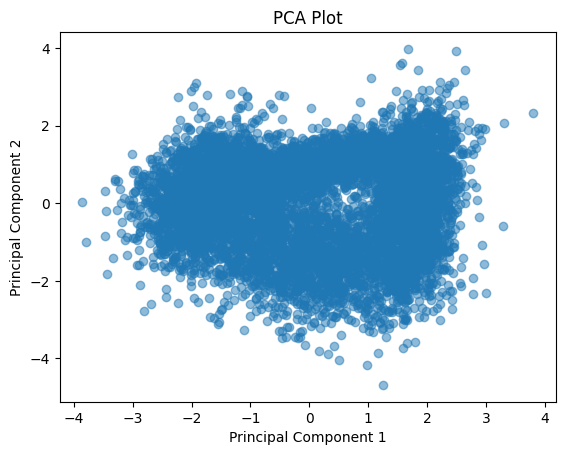

In [29]:
plt.scatter(projected_data['PCA1'], projected_data['PCA2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

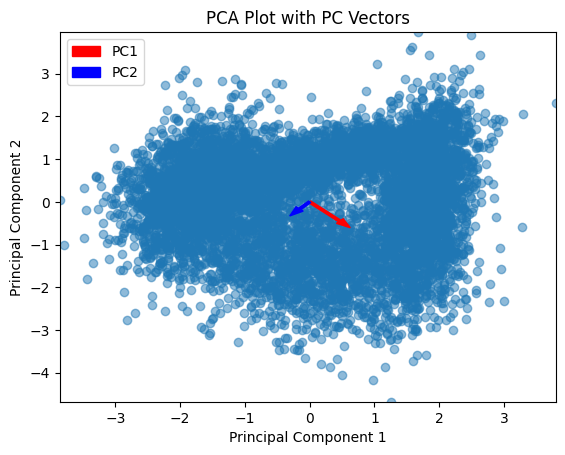

In [30]:
# Buat scatter plot
plt.scatter(projected_data['PCA1'], projected_data['PCA2'], alpha=0.5)

# Tentukan koefisien PC1 dan PC2 dari eigenvector
# Misalnya, eigenvector direpresentasikan dalam matriks 'eigenvectors'
PC1_coef = eigenvectors[0, 0]  # Koefisien untuk PC1
PC2_coef = eigenvectors[1, 0]  # Koefisien untuk PC2

# Tentukan titik awal (x,y) dan akhir (x,y) untuk vektor PC1
start_PC1 = [0, 0]
end_PC1 = [PC1_coef, PC2_coef]

# Tentukan titik awal (x,y) dan akhir (x,y) untuk vektor PC2
start_PC2 = [0, 0]
end_PC2 = [eigenvectors[0, 1], eigenvectors[1, 1]]  # Anggap eigenvectors sudah diurutkan berdasarkan eigenvalues

# Atur rentang sumbu x dan y agar vektor-vektor principal component terlihat dengan jelas
plt.xlim(min(projected_data['PCA1']), max(projected_data['PCA1']))
plt.ylim(min(projected_data['PCA2']), max(projected_data['PCA2']))

# Gambar garis vektor PC1 dan PC2
plt.arrow(*start_PC1, *end_PC1, color='r', width=0.05, label='PC1')
plt.arrow(*start_PC2, *end_PC2, color='b', width=0.05, label='PC2')

# Beri label sumbu x dan y
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Beri judul plot
plt.title('PCA Plot with PC Vectors')

# Tampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()


### Hubungan antara Fitur dan PCA

In [31]:
#loadings untuk melihat hubungan antara PCA dan fitur
# Menghitung matriks loadings dari eigenvectors untuk komponen utama PC1 dan PC2
loadings = eigenvectors[:, :k]
# Membuat DataFrame dari matriks loadings
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)
df_loadings

,PC1,PC2
Size,0.464844,-0.154942
Weight,-0.450132,-0.166129
Sweetness,-0.417699,0.172455
Softness,0.280790,-0.366705
HarvestTime,0.420871,-0.152530
Ripeness,0.059840,0.711095
Acidity,-0.383761,-0.505233


### Proporsi varian yang dijelaskan oleh PCA1 dan PCA2

In [32]:
explained_variance_ratio = eigenvalues[:2] / sum(eigenvalues)
explained_variance_ratio

array([0.30799845, 0.20004391])

Visualisasi Varian

<BarContainer object of 2 artists>

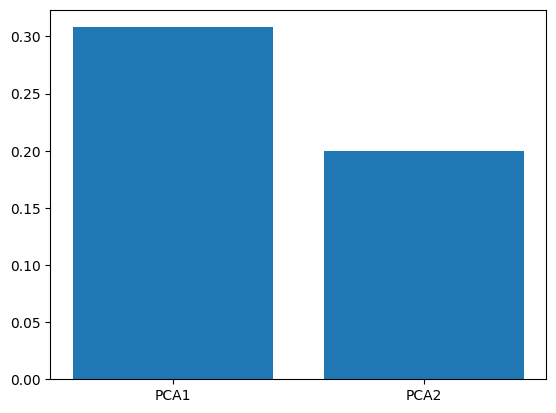

In [33]:
plt.bar(["PCA1","PCA2"], explained_variance_ratio)